In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display

N = 10
x_len = 1
x = np.linspace(0, x_len, N)

signal = np.sin(2 * math.pi * x)
# Set a seed for reproducibility
np.random.seed(0)
noise = np.random.normal(0, 0.3, N)

data = signal + noise
data = data.reshape(-1, 1)
x = x.reshape(-1, 1)

def plot_poly_regression(M):
    poly_features = PolynomialFeatures(degree=M, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, data)  # Fit the model
    plt.figure(figsize=(7, 5))
    plt.scatter(x, data, label='Noisy Training Data')
    # Visualisation only
    x_plot = np.linspace(0, x_len, 1000).reshape(-1, 1)
    x_plot_poly = poly_features.fit_transform(x_plot)
    plt.plot(x_plot, model.predict(x_plot_poly), label='Polynomial Regression Fit')
    plt.plot(x_plot, np.sin(2 * math.pi * x_plot), label='True function',linestyle='--')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend()
    plt.savefig(f'FittingPoly{M}.jpg', bbox_inches='tight', pad_inches=0.1)
    plt.show()
   
    
    
    print("Model coefficients:", model.coef_)
    print(f'Average Weight size: {np.mean(np.abs(model.coef_))}')

widgets.interactive(plot_poly_regression, M=widgets.IntSlider(min=1, max=10, step=1, value=4))


interactive(children=(IntSlider(value=4, description='M', max=10, min=1), Output()), _dom_classes=('widget-int…

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display

N = 10
x_len = 1
x = np.linspace(0, x_len, N)

signal = np.sin(2 * math.pi * x)
# Set a seed for reproducibility
np.random.seed(0)
noise = np.random.normal(0, 0.3, N)

data = signal + noise
data = data.reshape(-1, 1)
x = x.reshape(-1, 1)

def plot_poly_regression(M, W_mult):
    poly_features = PolynomialFeatures(degree=M, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, data)  # Fit the model
    
    model.coef_ = model.coef_*W_mult

    plt.scatter(x, data, label='Noisy Data')
    # Visualisation only
    x_plot = np.linspace(0, x_len, 1000).reshape(-1, 1)
    x_plot_poly = poly_features.fit_transform(x_plot)
    plt.plot(x_plot, model.predict(x_plot_poly), label='Polynomial Regression Fit')
    plt.plot(x_plot, np.sin(2 * math.pi * x_plot), label='True function',linestyle='--')
    plt.legend()
    plt.show()
    
    print("Model coefficients:", model.coef_)
    print(f'Average Weight size: {np.mean(np.abs(model.coef_))}')

widgets.interactive(plot_poly_regression, M=widgets.IntSlider(min=1, max=10, step=1, value=4), 
                    W_mult=widgets.FloatSlider(min=0.1, max=1.0, step=0.1, value=1))

interactive(children=(IntSlider(value=4, description='M', max=10, min=1), FloatSlider(value=1.0, description='…

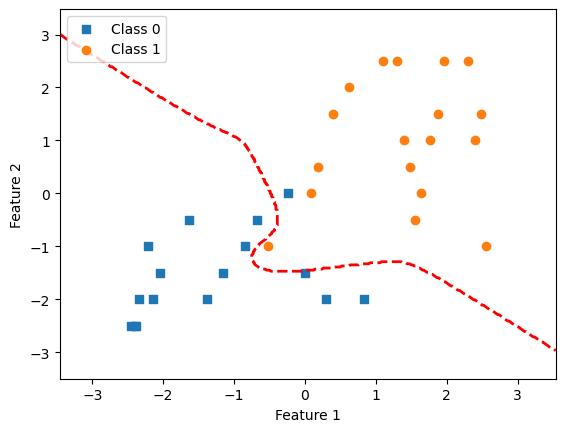

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Data points
x1 = (np.array([2, 5, 6, 8, 14, 18, 23, 43, 56, 67, 83, 91, 113, 125, 140, 167])-125)/50

y1 = (np.array([0, 0, 0, 10, 30, 10, 20, 40, 10, 20, 30, 40, 50, 20, 10, 10])-50)/20


x2 = (np.array([99, 129, 134, 145, 156, 180, 190, 195, 199, 203, 207, 213, 219, 223, 240, 245, 249, 253])-125)/50

y2 = (np.array([30, 50, 60, 80, 90, 100, 100, 70, 60, 40, 50, 70, 80, 100, 100, 70, 80, 30])-50)/20


# Combine x and y for each class to create feature arrays
features_0 = np.column_stack((x1, y1))


features_1 = np.column_stack((x2, y2))


# Combine features for all samples and create labels
X_train = np.vstack((features_0, features_1))
print()
y_train = np.concatenate((np.zeros(len(x1)), np.ones(len(x2))))

# Create polynomial features
degree = 15  # Degree of polynomial features
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X_train)

# Initialize and fit the model with polynomial features
model = LogisticRegression(max_iter=1000)
model.fit(X_poly, y_train)

# Prepare plot
fig, ax = plt.subplots()

# Plot the data points
ax.scatter(x1, y1, marker='s', label='Class 0')
ax.scatter(x2, y2, marker='o', label='Class 1')

# Create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot the decision boundary
Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='r', levels=[0.5], linestyles='dashed', linewidths=2)

# Labeling the axes and the legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Save and show the plot
plt.savefig('./2DScatter_with_polynomial_decision_boundary_line.png')
plt.show()
